Baseado em https://github.com/ageron/handson-ml2

In [1]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import sklearn

mpl.rc("axes", labelsize=14)
mpl.rc("xtick", labelsize=12)
mpl.rc("ytick", labelsize=12)

# Building an Image Classifier

First let's import TensorFlow and Keras.

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
tf.__version__

'2.14.0'

Let's start by loading the fashion MNIST dataset. Keras has a number of functions to load popular datasets in `keras.datasets`. The dataset is already split for you between a training set and a test set, but it can be useful to split the training set further to have a validation set:

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

The training set contains 60,000 grayscale images, each 28x28 pixels:

In [5]:
X_train_full.shape

(60000, 28, 28)

Each pixel intensity is represented as a byte (0 to 255):

In [6]:
X_train_full.dtype

dtype('uint8')

Let's split the full training set into a validation set and a (smaller) training set. We also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255.

In [7]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

You can plot an image using Matplotlib's `imshow()` function, with a `'binary'`
 color map:

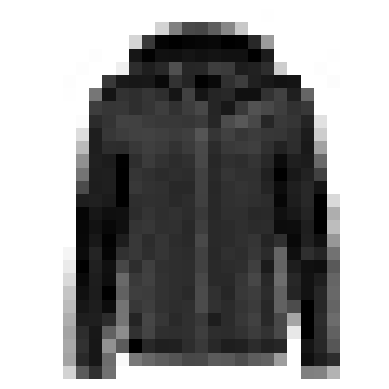

In [8]:
plt.imshow(X_train[0], cmap="binary")
plt.axis("off")
plt.show()

The labels are the class IDs (represented as uint8), from 0 to 9:

In [9]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

Here are the corresponding class names:

In [10]:
class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

So the first image in the training set is a coat:

In [11]:
class_names[y_train[0]]

'Coat'

The validation set contains 5,000 images, and the test set contains 10,000 images:

In [12]:
X_valid.shape

(5000, 28, 28)

In [13]:
X_test.shape

(10000, 28, 28)

Let's take a look at a sample of the images in the dataset:

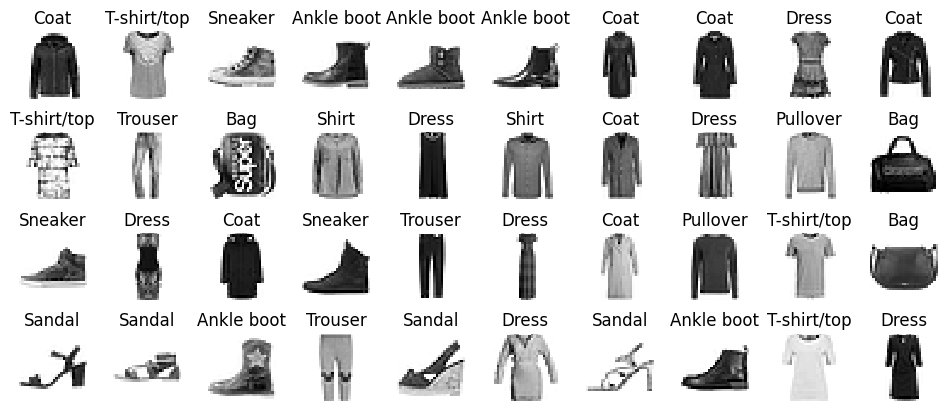

In [14]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis("off")
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [15]:
X_train.shape

(55000, 28, 28)

In [16]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [17]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax"),
])

In [18]:
model.layers

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
# Talvez precise de:
# pip install pydot
# pip install pydotplus
# pip install graphviz
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [21]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [22]:
model.get_layer(hidden1.name) is hidden1

True

In [23]:
weights, biases = hidden1.get_weights()

In [24]:
weights

array([[-0.04819705,  0.02864335,  0.01223291, ...,  0.03789013,
         0.05346021,  0.05401118],
       [-0.02954479, -0.03597072, -0.00017887, ..., -0.06616391,
        -0.07107679, -0.02167672],
       [-0.02301022,  0.06679292, -0.07157698, ...,  0.0323799 ,
        -0.0326373 , -0.04940516],
       ...,
       [-0.0405779 ,  0.00148118, -0.03336084, ..., -0.03930999,
         0.04704421,  0.03673916],
       [-0.06151938,  0.0409859 , -0.05726986, ..., -0.0624847 ,
         0.06408355,  0.02644196],
       [ 0.02259804, -0.06166654,  0.02642818, ...,  0.04565637,
         0.0576741 , -0.0276619 ]], dtype=float32)

In [25]:
weights.shape

(784, 300)

In [26]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [27]:
biases.shape

(300,)

In [28]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="sgd",
    metrics=["accuracy"],
)

This is equivalent to:

```python
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])
```

In [29]:
history = model.fit(
    X_train,
    y_train,
    epochs=30,
    batch_size=1024,
    validation_data=(X_valid, y_valid),
)

Epoch 1/30
54/54 [==============================] - 1s 13ms/step - loss: 1.8984 - accuracy: 0.4511 - val_loss: 1.5294 - val_accuracy: 0.6494
Epoch 2/30
54/54 [==============================] - 0s 8ms/step - loss: 1.3294 - accuracy: 0.6648 - val_loss: 1.1355 - val_accuracy: 0.6926
Epoch 3/30
54/54 [==============================] - 0s 8ms/step - loss: 1.0548 - accuracy: 0.6986 - val_loss: 0.9527 - val_accuracy: 0.7248
Epoch 4/30
54/54 [==============================] - 0s 8ms/step - loss: 0.9186 - accuracy: 0.7238 - val_loss: 0.8515 - val_accuracy: 0.7436
Epoch 5/30
54/54 [==============================] - 0s 7ms/step - loss: 0.8376 - accuracy: 0.7409 - val_loss: 0.7870 - val_accuracy: 0.7594
Epoch 6/30
54/54 [==============================] - 0s 8ms/step - loss: 0.7821 - accuracy: 0.7571 - val_loss: 0.7406 - val_accuracy: 0.7682
Epoch 7/30
54/54 [==============================] - 0s 7ms/step - loss: 0.7404 - accuracy: 0.7680 - val_loss: 0.7044 - val_accuracy: 0.7780
Epoch 8/30
54/54 [=

In [30]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 54}

In [31]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [32]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

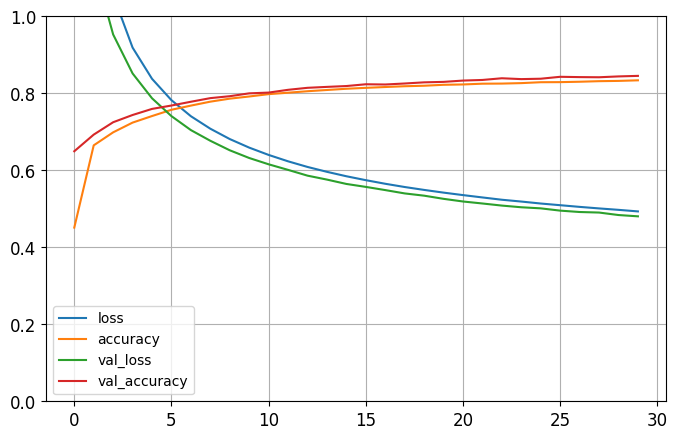

In [33]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [34]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.5185 - accuracy: 0.8223


[0.5185430645942688, 0.8223000168800354]

In [35]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 62ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.19, 0.  , 0.23, 0.01, 0.56],
       [0.  , 0.  , 0.92, 0.  , 0.01, 0.  , 0.07, 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [36]:
X_new.shape

(3, 28, 28)

In [37]:
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

1/1 [==============================] - 0s 15ms/step


array([9, 2, 1], dtype=int64)

In [38]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [39]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

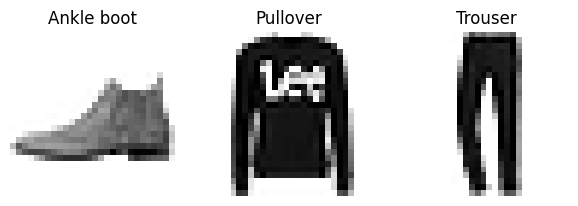

In [40]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(
        image.reshape((28, 28)),
        cmap="binary",
        interpolation="nearest",
    )
    plt.axis("off")
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

# Regression MLP

Let's load, split and scale the California housing dataset (the original one, not the modified one as in chapter 2):

In [41]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data,
    housing.target,
    random_state=42,
)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full,
    y_train_full,
    random_state=42,
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [42]:
np.random.seed(42)
tf.random.set_seed(42)

In [43]:
model = keras.models.Sequential([
    keras.layers.Dense(
        30,
        activation="relu",
        input_shape=X_train.shape[1:],
    ),
    keras.layers.Dense(1),
])
model.compile(
    loss="mean_squared_error",
    optimizer=keras.optimizers.SGD(lr=1e-3),
)
history = model.fit(
    X_train,
    y_train,
    epochs=20,
    validation_data=(X_valid, y_valid),
)
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 0.8532 - val_loss: 5.7422
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5855 - val_loss: 7.1669
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5250 - val_loss: 0.4899
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4224 - val_loss: 0.4452
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4107 - val_loss: 0.4269
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4004 - val_loss: 0.4380
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4016 - val_loss: 0.4119
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3896 - val_loss: 0.4081
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3819 - val_loss: 0.3962
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3787 - val_loss: 0.3954

In [44]:
mse_test

0.35457485914230347

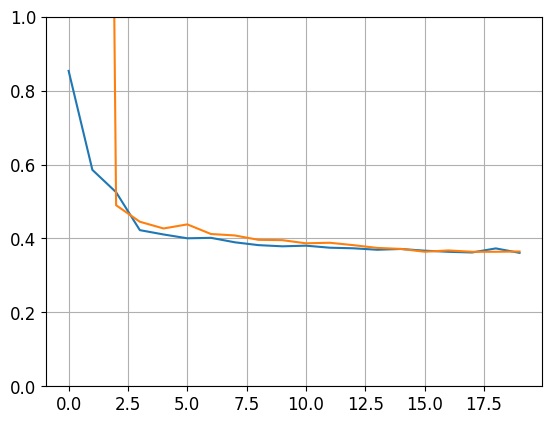

In [45]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [46]:
y_pred, y_test[:3]

(array([[0.7292957],
        [1.6906781],
        [4.221938 ]], dtype=float32),
 array([0.477  , 0.458  , 5.00001]))

# Functional API

Not all neural network models are simply sequential. Some may have complex topologies. Some may have multiple inputs and/or multiple outputs. For example, a Wide & Deep neural network (see [paper](https://ai.google/research/pubs/pub45413)) connects all or part of the inputs directly to the output layer.

In [47]:
np.random.seed(42)
tf.random.set_seed(42)

In [48]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

In [49]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 8)]                  0         []                            
                                                                                                  
 dense_5 (Dense)             (None, 30)                   270       ['input_1[0][0]']             
                                                                                                  
 dense_6 (Dense)             (None, 30)                   930       ['dense_5[0][0]']             
                                                                                                  
 concatenate (Concatenate)   (None, 38)                   0         ['input_1[0][0]',             
                                                                     'dense_6[0][0]']         

In [50]:
keras.utils.plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [51]:
model.compile(
    loss="mean_squared_error",
    optimizer=keras.optimizers.SGD(lr=1e-3),
)
history = model.fit(
    X_train,
    y_train,
    epochs=20,
    validation_data=(X_valid, y_valid),
)
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 0.8230 - val_loss: 0.6022
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4721 - val_loss: 0.4340
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4449 - val_loss: 3.0076
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4164 - val_loss: 19.5995
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4199 - val_loss: 41.7530
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 1.0175 - val_loss: 0.4106
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.8014 - val_loss: 79.0644
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6798 - val_loss: 758.6216
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.8208 - val_loss: 183.3885
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 4.8374 - val_loss:

What if you want to send different subsets of input features through the wide or deep paths? We will send 5 features (features 0 to 4), and 6 through the deep path (features 2 to 7). Note that 3 features will go through both (features 2, 3 and 4).

In [52]:
np.random.seed(42)
tf.random.set_seed(42)

In [53]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [54]:
keras.utils.plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [55]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit(
    (X_train_A, X_train_B),
    y_train,
    epochs=20,
    validation_data=((X_valid_A, X_valid_B), y_valid),
)
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 0.7588 - val_loss: 5.5367
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5154 - val_loss: 9.1628
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5170 - val_loss: 0.3930
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4173 - val_loss: 0.3862
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4092 - val_loss: 0.3749
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4017 - val_loss: 0.4671
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3980 - val_loss: 0.3678
Epoch 8/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3877 - val_loss: 0.3672
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3824 - val_loss: 0.3602
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3793 - val_loss: 0.3590

Adding an auxiliary output for regularization:

In [56]:
np.random.seed(42)
tf.random.set_seed(42)

In [57]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.models.Model(
    inputs=[input_A, input_B],
    outputs=[output, aux_output],
)

In [58]:
model.compile(
    loss=["mse", "mse"],
    loss_weights=[0.9, 0.1],
    optimizer=keras.optimizers.SGD(lr=1e-3),
)

In [59]:
keras.utils.plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [60]:
history = model.fit(
    [X_train_A, X_train_B],
    [y_train, y_train],
    epochs=20,
    validation_data=(
        [X_valid_A, X_valid_B],
        [y_valid, y_valid],
    ),
)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.8876 - main_output_loss: 0.7782 - aux_output_loss: 1.8725 - val_loss: 0.7528 - val_main_output_loss: 0.6497 - val_aux_output_loss: 1.6810
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5429 - main_output_loss: 0.4812 - aux_output_loss: 1.0982 - val_loss: 1.0189 - val_main_output_loss: 0.9698 - val_aux_output_loss: 1.4610
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4997 - main_output_loss: 0.4536 - aux_output_loss: 0.9148 - val_loss: 0.7540 - val_main_output_loss: 0.7270 - val_aux_output_loss: 0.9973
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4629 - main_output_loss: 0.4268 - aux_output_loss: 0.7882 - val_loss: 0.4458 - val_main_output_loss: 0.3992 - val_aux_output_loss: 0.8653
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4437 - main_output_loss: 0.4144 - aux_output_loss: 0.7074 - val_loss

In [61]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B],
    [y_test, y_test],
)
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

162/162 [==============================] - 0s 908us/step - loss: 0.3584 - main_output_loss: 0.3461 - aux_output_loss: 0.4689


1/1 [==============================] - 0s 48ms/step


# The subclassing API

In [62]:
class WideAndDeepModel(keras.models.Model):

    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)

    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output


model = WideAndDeepModel(30, activation="relu")

In [63]:
model.compile(loss="mse",
              loss_weights=[0.9, 0.1],
              optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(
    (X_train_A, X_train_B),
    (y_train, y_train),
    epochs=10,
    validation_data=(
        (X_valid_A, X_valid_B),
        (y_valid, y_valid),
    ),
)
total_loss, main_loss, aux_loss = model.evaluate(
    (X_test_A, X_test_B),
    (y_test, y_test),
)
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 0.8968 - output_1_loss: 0.7565 - output_2_loss: 2.1592 - val_loss: 0.6574 - val_output_1_loss: 0.5851 - val_output_2_loss: 1.3088
Epoch 2/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5250 - output_1_loss: 0.4608 - output_2_loss: 1.1021 - val_loss: 1.4048 - val_output_1_loss: 1.4390 - val_output_2_loss: 1.0969
Epoch 3/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4974 - output_1_loss: 0.4496 - output_2_loss: 0.9278 - val_loss: 1.4307 - val_output_1_loss: 1.4939 - val_output_2_loss: 0.8614
Epoch 4/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4566 - output_1_loss: 0.4176 - output_2_loss: 0.8071 - val_loss: 2.9033 - val_output_1_loss: 3.0024 - val_output_2_loss: 2.0117
Epoch 5/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4506 - output_1_loss: 0.4206 - output_2_loss: 0.7204 - val_loss: 3.6357 - val_output_1_loss: 3.7198 - val_ou

1/1 [==============================] - 0s 46ms/step


# Saving and Restoring

In [64]:
np.random.seed(42)
tf.random.set_seed(42)

In [65]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1),
])

In [66]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(
    X_train,
    y_train,
    epochs=10,
    validation_data=(X_valid, y_valid),
)
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 1s 1ms/step - loss: 0.7650 - val_loss: 5.7471
Epoch 2/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5072 - val_loss: 1.7046
Epoch 3/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4141 - val_loss: 0.3976
Epoch 4/10
363/363 [==============================] - 1s 1ms/step - loss: 0.3877 - val_loss: 0.3884
Epoch 5/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3797 - val_loss: 0.3823
Epoch 6/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3717 - val_loss: 0.3737
Epoch 7/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3672 - val_loss: 0.3683
Epoch 8/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3625 - val_loss: 0.3718
Epoch 9/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3579 - val_loss: 0.3629
Epoch 10/10
162/162 [==============================] - 0s 682us/step - loss: 0.3493


In [67]:
model.save("my_keras_model.h5")

c:\Users\felip\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [68]:
model = keras.models.load_model("my_keras_model.h5")

In [69]:
model.predict(X_new)

1/1 [==============================] - 0s 37ms/step


array([[0.7643038],
       [1.8859165],
       [4.3943157]], dtype=float32)

In [70]:
model.save_weights("my_keras_weights.ckpt")

In [71]:
model.load_weights("my_keras_weights.ckpt")

# Using Callbacks during Training

In [72]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [73]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1),
])

In [74]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint(
    "my_keras_model.h5",
    save_best_only=True,
)

In [75]:
history = model.fit(
    X_train,
    y_train,
    epochs=10,
    validation_data=(X_valid, y_valid),
    callbacks=[checkpoint_cb],
)
model = keras.models.load_model("my_keras_model.h5")  # rollback to best model
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 1s 1ms/step - loss: 0.8271 - val_loss: 0.9113
Epoch 2/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4763 - val_loss: 2.5153
Epoch 3/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4417 - val_loss: 1.0095
Epoch 4/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3933 - val_loss: 0.5591
Epoch 5/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3785 - val_loss: 0.3915
Epoch 6/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3658 - val_loss: 0.4279
Epoch 7/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3590 - val_loss: 0.3406
Epoch 8/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3517 - val_loss: 0.3334
Epoch 9/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3453 - val_loss: 0.3567
Epoch 10/10
162/162 [==============================] - 0s 883us/step - loss: 0.3482


In [76]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
early_stopping_cb = keras.callbacks.EarlyStopping(
    patience=10,
    restore_best_weights=True,
)

In [77]:
history = model.fit(
    X_train,
    y_train,
    epochs=100,
    validation_data=(X_valid, y_valid),
    callbacks=[checkpoint_cb, early_stopping_cb],
)
mse_test = model.evaluate(X_test, y_test)

Epoch 1/100
363/363 [==============================] - 1s 1ms/step - loss: 0.3458 - val_loss: 0.3325
Epoch 2/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3414 - val_loss: 0.4109
Epoch 3/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3383 - val_loss: 0.3383
Epoch 4/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3343 - val_loss: 0.3467
Epoch 5/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3313 - val_loss: 0.3296
Epoch 6/100
363/363 [==============================] - 1s 1ms/step - loss: 0.3275 - val_loss: 0.3319
Epoch 7/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3253 - val_loss: 0.3084
Epoch 8/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3223 - val_loss: 0.3114
Epoch 9/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3191 - val_loss: 0.3422
Epoch 10/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3174 - val_lo

In [78]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):

    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

In [79]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(
    X_train,
    y_train,
    epochs=1,
    validation_data=(X_valid, y_valid),
    callbacks=[val_train_ratio_cb],
)

311/363 [========================>.....] - ETA: 0s - loss: 0.3209
val/train: 0.97
363/363 [==============================] - 0s 1ms/step - loss: 0.3220 - val_loss: 0.3119


# TensorBoard

In [80]:
import os

root_logdir = os.path.join(os.curdir, "my_logs")

In [81]:
def get_run_logdir():
    import time

    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)


run_logdir = get_run_logdir()
run_logdir

'.\\my_logs\\run_2023_11_06-15_15_12'

In [82]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [83]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1),
])
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

In [84]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(
    X_train,
    y_train,
    epochs=30,
    validation_data=(X_valid, y_valid),
    callbacks=[checkpoint_cb, tensorboard_cb],
)

Epoch 1/30
363/363 [==============================] - 1s 2ms/step - loss: 0.7158 - val_loss: 4.7409
Epoch 2/30
363/363 [==============================] - 0s 1ms/step - loss: 0.4850 - val_loss: 4.2532
Epoch 3/30
363/363 [==============================] - 0s 1ms/step - loss: 0.4678 - val_loss: 0.3929
Epoch 4/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3879 - val_loss: 0.3816
Epoch 5/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3797 - val_loss: 0.3768
Epoch 6/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3708 - val_loss: 0.3820
Epoch 7/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3657 - val_loss: 0.3704
Epoch 8/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3614 - val_loss: 0.3609
Epoch 9/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3554 - val_loss: 0.3513
Epoch 10/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3515 - val_loss: 0.3574

To start the TensorBoard server, one option is to open a terminal, if needed activate the virtualenv where you installed TensorBoard, go to this notebook's directory, then type:

```bash
$ tensorboard --logdir=./my_logs --port=6006
```

You can then open your web browser to [localhost:6006](http://localhost:6006) and use TensorBoard. Once you are done, press Ctrl-C in the terminal window, this will shutdown the TensorBoard server.

Alternatively, you can load TensorBoard's Jupyter extension and run it like this:

In [ ]:
%reload_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

In [86]:
run_logdir2 = get_run_logdir()
run_logdir2

'.\\my_logs\\run_2023_11_06-15_16_40'

In [87]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [88]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1),
])
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=0.05))

In [89]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir2)
history = model.fit(
    X_train,
    y_train,
    epochs=30,
    validation_data=(X_valid, y_valid),
    callbacks=[checkpoint_cb, tensorboard_cb],
)

Epoch 1/30
363/363 [==============================] - 1s 2ms/step - loss: 0.7737 - val_loss: 2.2560
Epoch 2/30
363/363 [==============================] - 0s 1ms/step - loss: 0.4758 - val_loss: 3.3478
Epoch 3/30
363/363 [==============================] - 0s 1ms/step - loss: 0.4371 - val_loss: 0.3736
Epoch 4/30
363/363 [==============================] - 1s 1ms/step - loss: 0.3875 - val_loss: 0.4133
Epoch 5/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3817 - val_loss: 0.3993
Epoch 6/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3700 - val_loss: 0.6428
Epoch 7/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3770 - val_loss: 0.4078
Epoch 8/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3603 - val_loss: 0.7851
Epoch 9/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3554 - val_loss: 0.5136
Epoch 10/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3528 - val_loss: 0.3315

Notice how TensorBoard now sees two runs, and you can compare the learning curves.

Check out the other available logging options:

In [90]:
help(keras.callbacks.TensorBoard.__init__)

Help on function __init__ in module keras.src.callbacks:

__init__(self, log_dir='logs', histogram_freq=0, write_graph=True, write_images=False, write_steps_per_second=False, update_freq='epoch', profile_batch=0, embeddings_freq=0, embeddings_metadata=None, **kwargs)
    Initialize self.  See help(type(self)) for accurate signature.



**Atividade**: 

- Converta o modelo de classificador da primeira parte do notebook para a API funcional.
- Incorpore callbacks para monitorar o desempenho do treinamento
- Tente aprimorar o desempenho do classificador: tente modificar a topologia da rede (numero de camadas e numero de neuronios em cada camada), a taxa de aprendizado, o algoritmo de otimização.
